In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
import seaborn as sns #시각화를 위한 라이브러리
import matplotlib.pyplot as plt
import calendar 
from datetime import datetime
%matplotlib inline

import os

train = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')
test = pd.read_csv('~/data/data/bike-sharing-demand/test.csv')

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [2]:
# datetime 컬럼 변환
train['datetime'] = pd.to_datetime(train['datetime'])

# 연, 월, 일, 시, 분, 초 컬럼 추가
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

train.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,2012,12,19,23,0,0


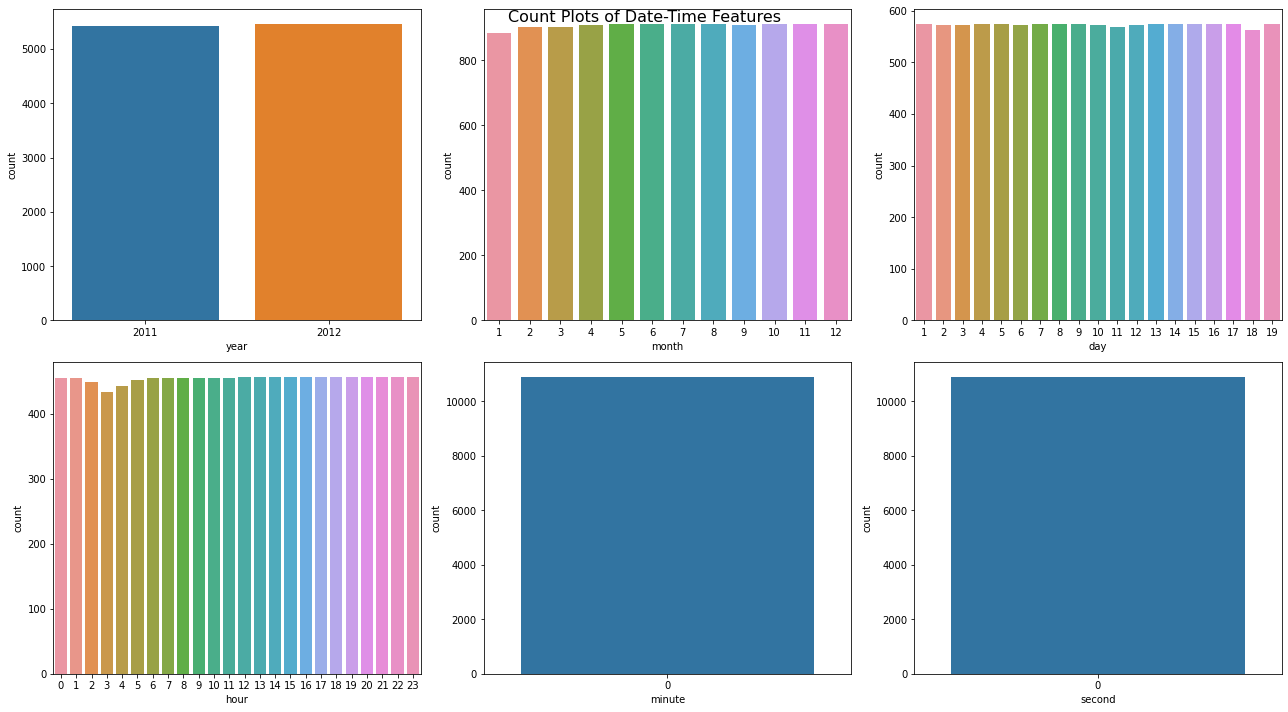

In [3]:
# subplots 설정
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

# 각 컬럼별 countplot 생성
sns.countplot(x='year', data=train, ax=axes[0])
sns.countplot(x='month', data=train, ax=axes[1])
sns.countplot(x='day', data=train, ax=axes[2])
sns.countplot(x='hour', data=train, ax=axes[3])
sns.countplot(x='minute', data=train, ax=axes[4])
sns.countplot(x='second', data=train, ax=axes[5])

# 레이아웃 조정
fig.tight_layout()

# 그래프 제목 설정
fig.suptitle('Count Plots of Date-Time Features', fontsize=16)

plt.show() # minute & second are meaningless. Data is evenly distributed w.r.t other datetime arguments.

In [4]:
# Setting features and target.
# Set the target y as the 'count' column.
# Exclude 'causal', 'registered', 'year', 'day', 'minute', 'second', 'datetime' in feature data.

from sklearn.model_selection import train_test_split

y = train['count']

features = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 
            'month', 'hour']
X = train[features]

# Separate train data and test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Now get the linear model from sklearn and train our model.
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [6]:
# feed test data into model to get prediction, MSE, and RMSE.
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.2f}")

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse:.2f}")

MSE: 21660.42
RMSE: 147.17


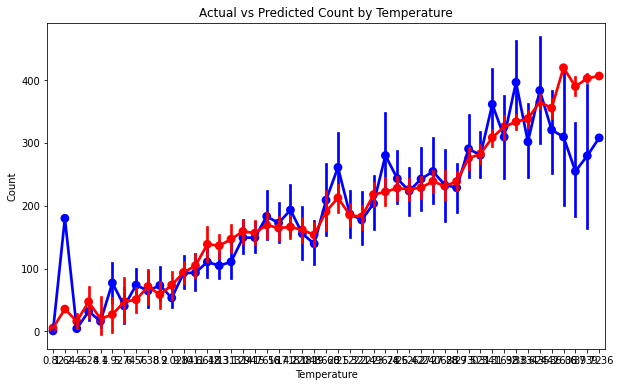

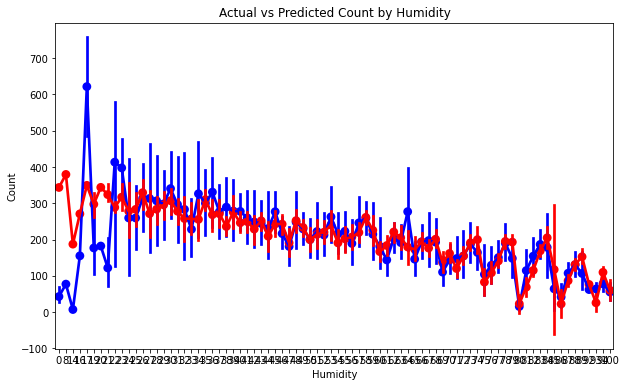

In [7]:
# Visualize : actual count & predicted count w.r.t temperature
plt.figure(figsize=(10, 6))
sns.pointplot(X_test['temp'], y_test, color='blue', label='Actual Count')
sns.pointplot(X_test['temp'], y_pred, color='red', label='Predicted Count')
plt.title('Actual vs Predicted Count by Temperature')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()

# Visualize : actual count & predicted count w.r.t humidity
plt.figure(figsize=(10, 6))
sns.pointplot(X_test['humidity'], y_test, color='blue', label='Actual Count')
sns.pointplot(X_test['humidity'], y_pred, color='red', label='Predicted Count')
plt.title('Actual vs Predicted Count by Humidity')
plt.xlabel('Humidity')
plt.ylabel('Count')
plt.show()